In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

from cleanplots import *
import matplotlib.pyplot as plt
from bsccm import BSCCM
import jax.numpy as np
import numpy as onp
import time
from tqdm import tqdm
from bsccm_utils import *
from plot_utils import *
from image_utils import *
from bsccm.led_array_calibration import plot_led_pattern, illumination_to_led_indices, get_led_na_xy, get_led_na


bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')
bsccm_coherent = BSCCM('/home/hpinkard_waller/data/BSCCM-coherent/')

Opening BSCCM
Opened BSCCM
Opening BSCCM-coherent
Opened BSCCM-coherent


# How does angle of illumination affect entropy

## TODO MAKE the second figures smaller

phtons per pixel:  {'led_2': 32.411574918420996, 'led_26': 28.0781563108657, 'led_82': 29.4941871697301, 'led_118': 38.962195499701785}
Rescale to fraction:  {'led_2': 0.8663002764147566, 'led_26': 1.0, 'led_82': 0.9519894937020786, 'led_118': 0.7206512864779555}


100%|██████████| 20000/20000 [00:00<00:00, 1038386.83it/s]


channel led_2: sum of log eigenvalues: 0.00012787670129910111


100%|██████████| 20000/20000 [00:00<00:00, 1017429.93it/s]


channel led_26: sum of log eigenvalues: 0.0001343674521194771


100%|██████████| 20000/20000 [00:00<00:00, 1060909.07it/s]


channel led_82: sum of log eigenvalues: 0.00013381634198594838


100%|██████████| 20000/20000 [00:00<00:00, 1070494.37it/s]


channel led_118: sum of log eigenvalues: 0.00012558461457956582


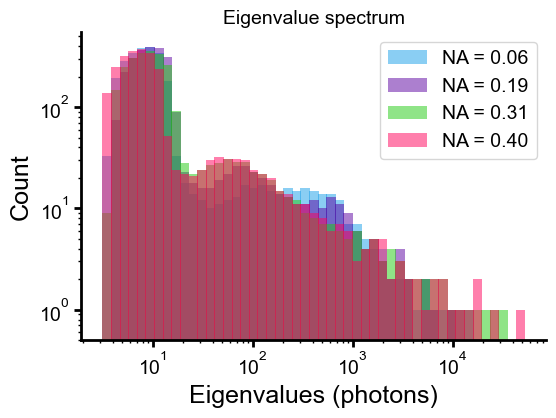

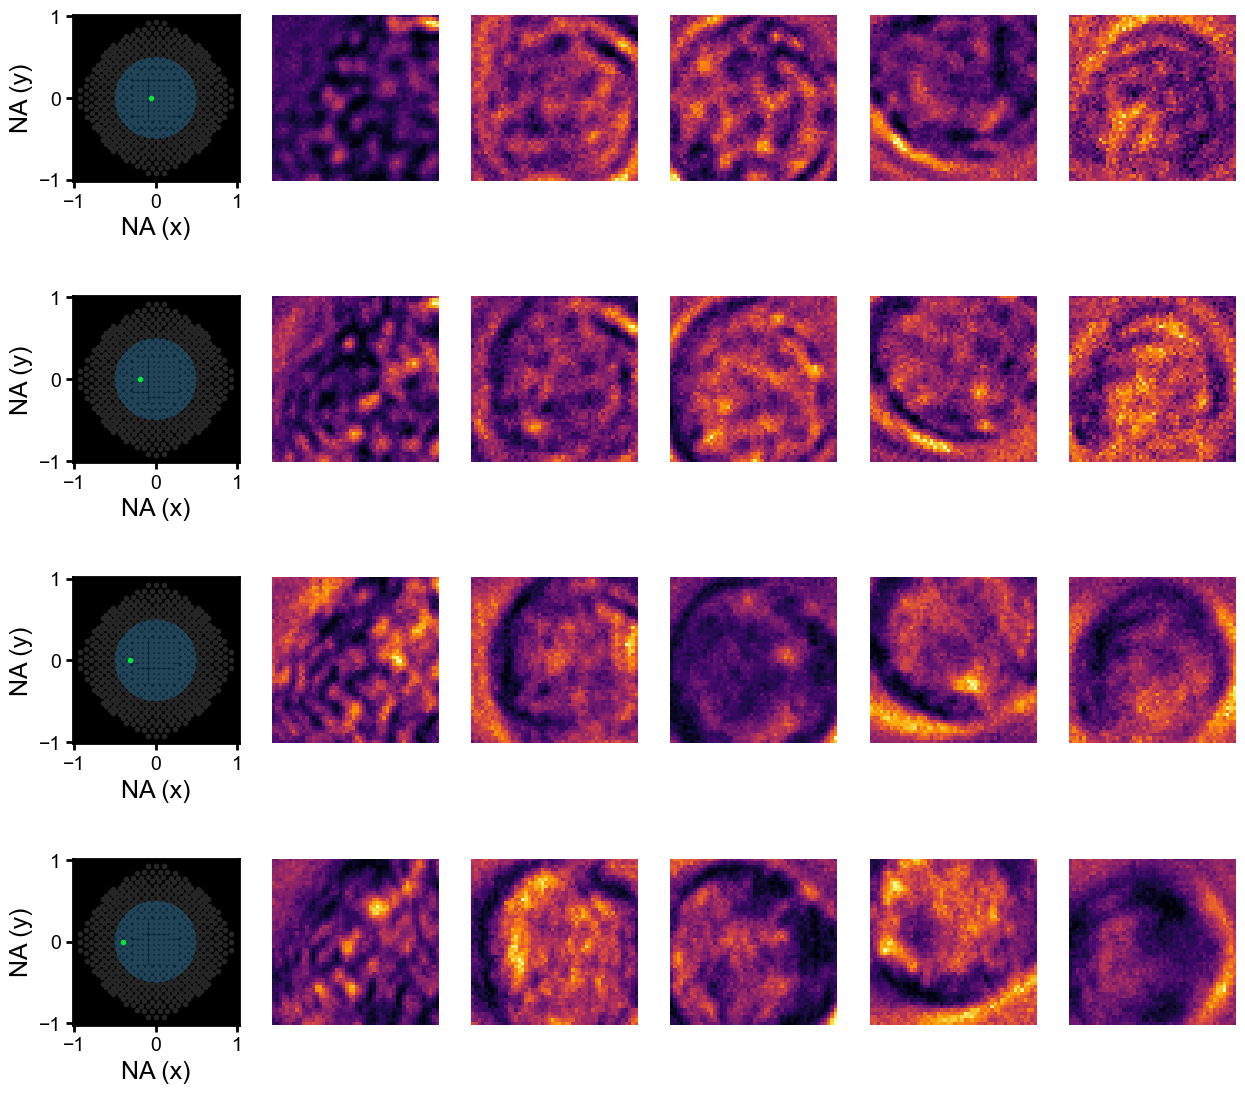

In [2]:
num_images = 4000
patch_size = 50
num_patches = 20000

# num_images = 400
# patch_size = 50
# num_patches = 2000

num_patches_to_show = 5

fig, axes = plt.subplots(1, 1, figsize=(6,4), sharex='col')


# led_indices = [2, 10, 26, 46, 82, 118]
list_of_led_index_lists = [2, 26, 82, 118]
channels = ['led_{}'.format(i) for i in list_of_led_index_lists]

example_patch_fig, example_patch_axes = plt.subplots(len(channels), 
                                        num_patches_to_show + 1, figsize=(3 * num_patches_to_show, 2 + 3 * len(channels)))

photon_rescale_fractions = compute_photon_rescale_fraction(bsccm_coherent, channels)

hist = OverlayedHistograms(ax=axes)

for index, (channel_name, led_index) in enumerate(zip(channels, list_of_led_index_lists)):
    images = load_bsccm_images(bsccm_coherent, channel_name, num_images=num_images, edge_crop=32, convert_units_to_photons=True)
    patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches)
    patches = add_shot_noise_to_experimenal_data(patches, photon_rescale_fractions[channel_name])
    values = compute_eigenvalues(patches)
    print('channel {}: sum of log eigenvalues: {}'.format(channel_name, np.sum(np.log(values)) / onp.prod(patches.shape)))

    # plot a few example patches
    plot_led_pattern(ax=example_patch_axes[index, 0], led_indices=[led_index], legend=False, shorten_na_labels=True)

    for j in range(num_patches_to_show):
        ax = example_patch_axes[index, 1 + j]
        im = ax.imshow(patches[j], cmap='inferno', interpolation='nearest')
        clear_spines(ax, all=True)
        ax.set(xticks=[], yticks=[])

    
    hist.add(values, label='NA = {:.2f}'.format(get_led_na(led_index)))
    axes.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Eigenvalue spectrum')

hist.plot()
axes.set(xlabel='Eigenvalues (photons)', ylabel='Count')
axes.legend()
clear_spines(axes)
# fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_eigenvalue_spectrum_real_data_with_different_exposure' + '.pdf', transparent=True)
# example_patch_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_example_patches_real_data_with_different_exposure' + '.pdf', transparent=True)

# Information content and partial coherence
if you sum coherent modes, and they are more "orthogonal", then the entropy maybe could go up?
try a cluster of LEDs in same area

Photon fractions: {26: 1.0}
Photon fractions: {10: 0.9042992112871069, 26: 0.9820543094917397, 30: 0.9725788547584479, 31: 0.8681738297633648, 46: 0.9767476087034187, 14: 0.9785635132665594, 15: 1.0, 50: 0.9605792562326657, 51: 0.8652935439879729}
Photon fractions: {10: 0.8346790519112692, 26: 0.9064479430489009, 30: 0.8977019843280533, 31: 0.8013348901296258, 46: 0.9015497943747822, 14: 0.90322589613425, 15: 0.923012031297975, 50: 0.8866262105180109, 51: 0.7986763517053627, 6: 0.8937409172046977, 2: 0.780320708567859, 7: 0.7974176764040428, 23: 0.9327683976154333, 39: 0.818557967485557, 63: 1.0, 87: 0.7581442367679007, 82: 0.8092834721600769, 86: 0.6492790378287223, 62: 0.7618699768014627, 38: 0.7612635788244649, 22: 0.9929849169984636}
Photon fractions: {10: 0.7576966546397299, 26: 0.8228463053919177, 30: 0.8149069859023136, 31: 0.7274278228344206, 46: 0.8183999126667026, 14: 0.8199214276646848, 15: 0.837882688807486, 50: 0.804852730024921, 51: 0.7250144812444014, 6: 0.81131124775446

100%|██████████| 20000/20000 [00:00<00:00, 1076373.34it/s]


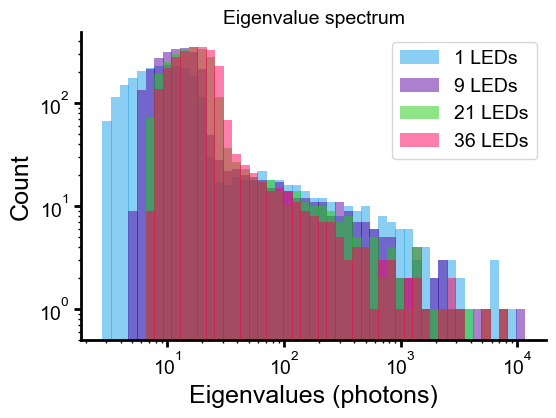

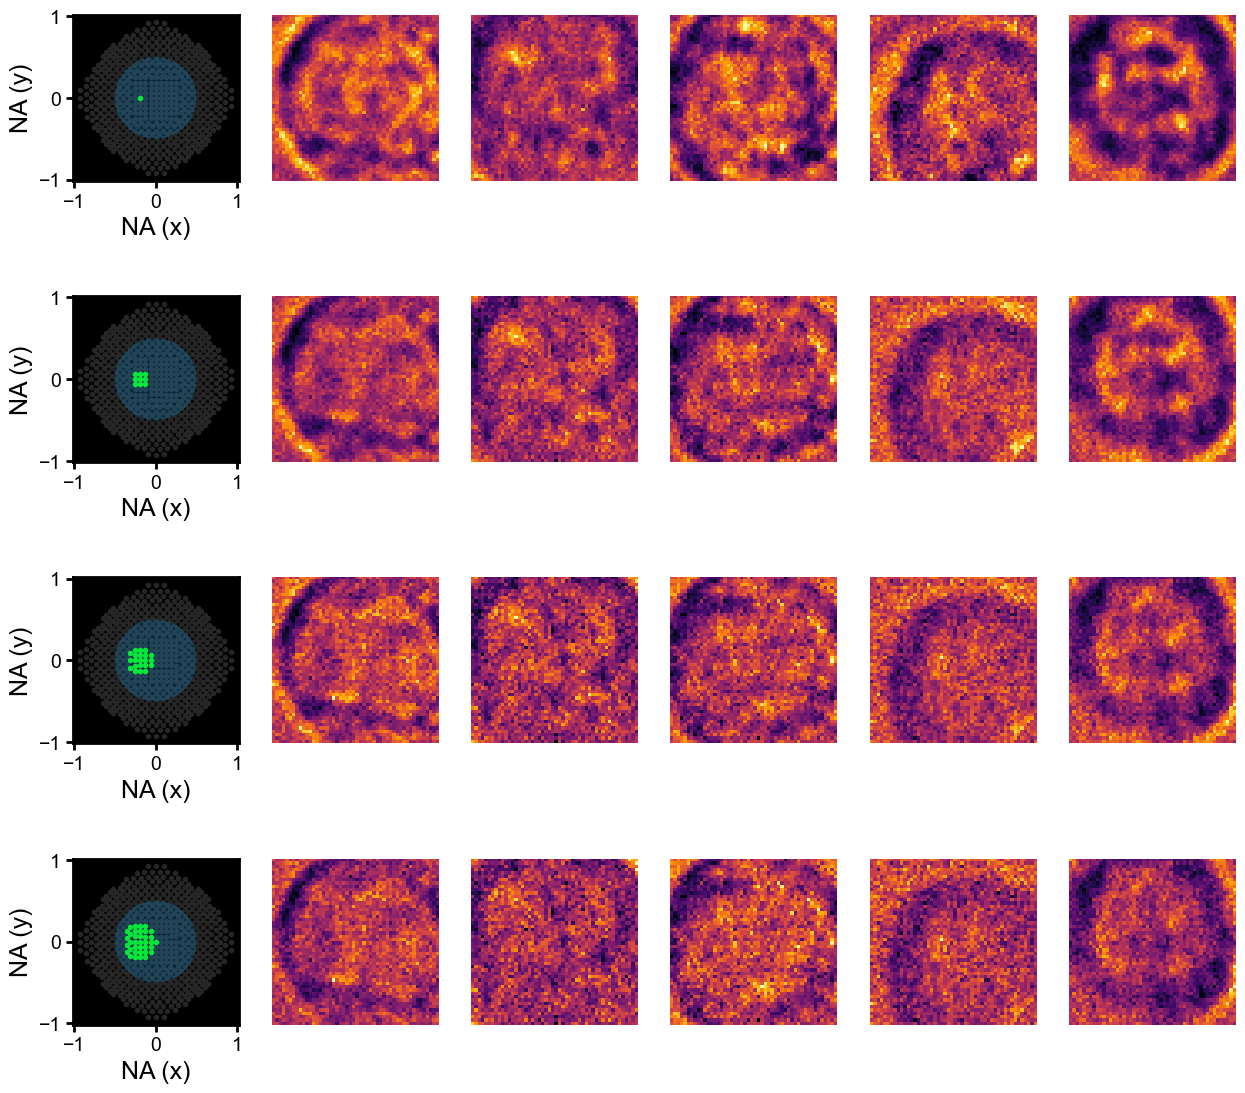

In [3]:
num_images = 4000
patch_size = 50
num_patches = 20000

# num_images = 400
# patch_size = 50
# num_patches = 2000

num_patches_to_show = 5

fig, axes = plt.subplots(1, 1, figsize=(6,4), sharex='col')


# led_indices = [2, 10, 26, 46, 82, 118]
list_of_led_index_lists = [(26,), 
                        #    (10, 26, 30, 31, 46), 
                           (10, 26, 30, 31, 46, 14, 15, 50, 51), 
                           (10, 26, 30, 31, 46, 14, 15, 50, 51, 6, 2, 7, 23, 39, 63, 87, 82, 86, 62, 38, 22),
                           (10, 26, 30, 31, 46, 14, 15, 50, 51, 6, 2, 7, 23, 39, 63, 87, 82, 86, 62, 38, 22, 1, 16, 40, 58, 70, 102, 110, 96, 94, 116, 106, 71, 59, 41, 17,)
                           ]

example_patch_fig, example_patch_axes = plt.subplots(len(list_of_led_index_lists), 
                                        num_patches_to_show + 1, figsize=(3 * num_patches_to_show, 2 + 3 * len(list_of_led_index_lists)))

# synthesize multi-led patterns with equalized noise among components
images = {led_index_list: generate_synthetic_multi_led_images(bsccm_coherent, led_index_list, edge_crop=32)
            for led_index_list in list_of_led_index_lists}

# now compute scale factors between multi-led synthetic images
photon_rescale_fractions = compute_photon_rescale_fraction(None, list_of_led_index_lists, images)

hist = OverlayedHistograms(ax=axes)

for index, led_index_list in enumerate(list_of_led_index_lists):
    photon_scaled_images = images[led_index_list]
    patches = extract_patches(photon_scaled_images, patch_size=patch_size, num_patches=num_patches)
    patches = add_shot_noise_to_experimenal_data(patches, photon_rescale_fractions[led_index_list])
    values = compute_eigenvalues(patches)

    # plot a few example patches
    plot_led_pattern(ax=example_patch_axes[index, 0], led_indices=led_index_list, 
                     legend=False, shorten_na_labels=True)

    for j in range(num_patches_to_show):
        ax = example_patch_axes[index, 1 + j]
        im = ax.imshow(patches[j], cmap='inferno', interpolation='nearest')
        clear_spines(ax, all=True)
        ax.set(xticks=[], yticks=[])

    values = compute_eigenvalues(patches)
    hist.add(values, label='{} LEDs'.format(len(led_index_list)))
    axes.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Eigenvalue spectrum')

hist.plot()
axes.set(xlabel='Eigenvalues (photons)', ylabel='Count')
axes.legend()
clear_spines(axes)
# fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_eigenvalue_spectrum_real_data_with_different_exposure' + '.pdf', transparent=True)
# example_patch_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_example_patches_real_data_with_different_exposure' + '.pdf', transparent=True)


## LEDs along same axis


Photon fractions: {10: 1.0}
Photon fractions: {82: 1.0}
Photon fractions: {10: 1.0, 82: 0.9695744373923834}
phtons per pixel:  {(10,): 31.154871956763323, (82,): 32.132522017136324, (10, 82): 62.309795340511045}
Rescale to fraction:  {(10,): 1.0, (82,): 0.9695744373923834, (10, 82): 0.4999995873282514}


100%|██████████| 20000/20000 [00:00<00:00, 725005.88it/s]


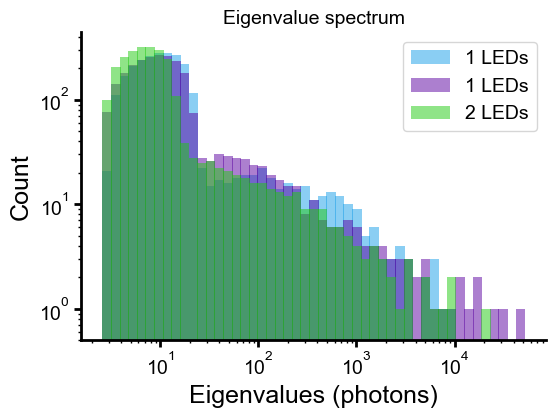

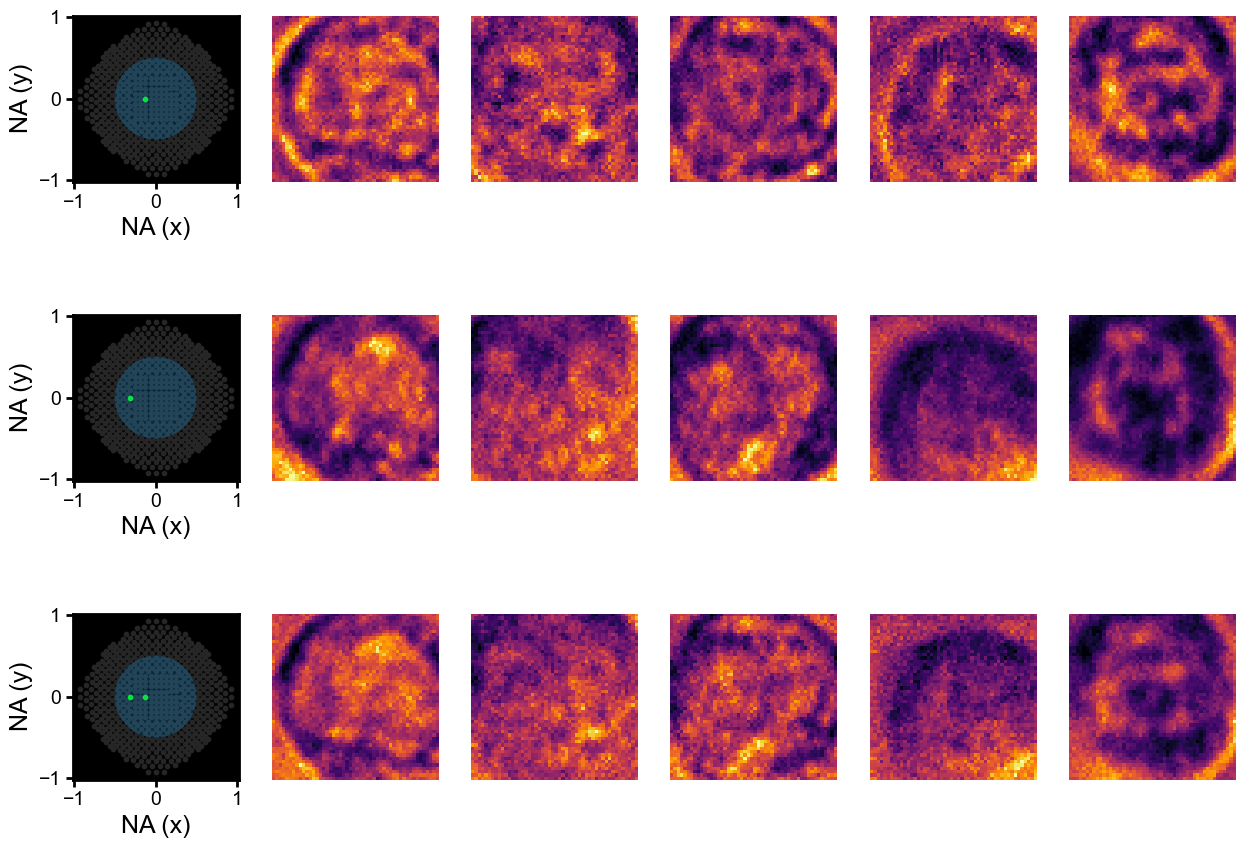

In [4]:
num_images = 4000
patch_size = 50
num_patches = 20000

# num_images = 400
# patch_size = 50
# num_patches = 2000

num_patches_to_show = 5

fig, axes = plt.subplots(1, 1, figsize=(6,4), sharex='col')

list_of_led_index_lists = [(10,), 
                           (82,), 
                           (10, 82),                        
                           ]

example_patch_fig, example_patch_axes = plt.subplots(len(list_of_led_index_lists), 
                                        num_patches_to_show + 1, figsize=(3 * num_patches_to_show, 2 + 3 * len(list_of_led_index_lists)))

# synthesize multi-led patterns with equalized noise among components
images = {led_index_list: generate_synthetic_multi_led_images(bsccm_coherent, led_index_list, edge_crop=32)
            for led_index_list in list_of_led_index_lists}

# now compute scale factors between multi-led synthetic images
photon_rescale_fractions = compute_photon_rescale_fraction(None, list_of_led_index_lists, images)

hist = OverlayedHistograms(ax=axes)

for index, led_index_list in enumerate(list_of_led_index_lists):
    photon_scaled_images = images[led_index_list]
    patches = extract_patches(photon_scaled_images, patch_size=patch_size, num_patches=num_patches)
    patches = add_shot_noise_to_experimenal_data(patches, photon_rescale_fractions[led_index_list])
    values = compute_eigenvalues(patches)

    # plot a few example patches
    plot_led_pattern(ax=example_patch_axes[index, 0], led_indices=led_index_list, 
                     legend=False, shorten_na_labels=True)

    for j in range(num_patches_to_show):
        ax = example_patch_axes[index, 1 + j]
        im = ax.imshow(patches[j], cmap='inferno', interpolation='nearest')
        clear_spines(ax, all=True)
        ax.set(xticks=[], yticks=[])

    values = compute_eigenvalues(patches)
    hist.add(values, label='{} LEDs'.format(len(led_index_list)))
    axes.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Eigenvalue spectrum')

hist.plot()
axes.set(xlabel='Eigenvalues (photons)', ylabel='Count')
axes.legend()
clear_spines(axes)
# fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_eigenvalue_spectrum_real_data_with_different_exposure' + '.pdf', transparent=True)
# example_patch_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_example_patches_real_data_with_different_exposure' + '.pdf', transparent=True)


## LEDs along orthogonal axes

Photon fractions: {118: 1.0}
Photon fractions: {119: 1.0}
Photon fractions: {118: 0.9602802422647474, 119: 1.0}
phtons per pixel:  {(118,): 41.72939785699823, (119,): 40.071916283680295, (118, 119): 80.14380001015667}
Rescale to fraction:  {(118,): 0.9602802422647474, (119,): 1.0, (118, 119): 0.5000002031174209}


100%|██████████| 20000/20000 [00:00<00:00, 461889.60it/s]


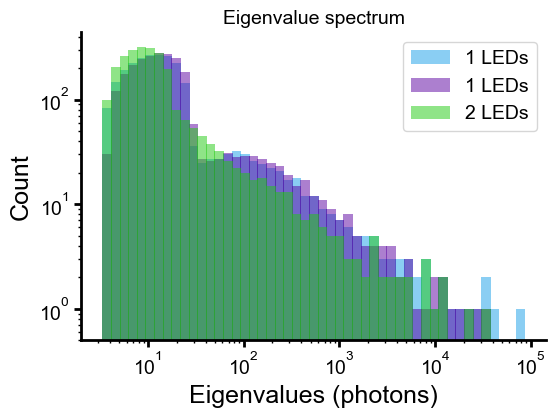

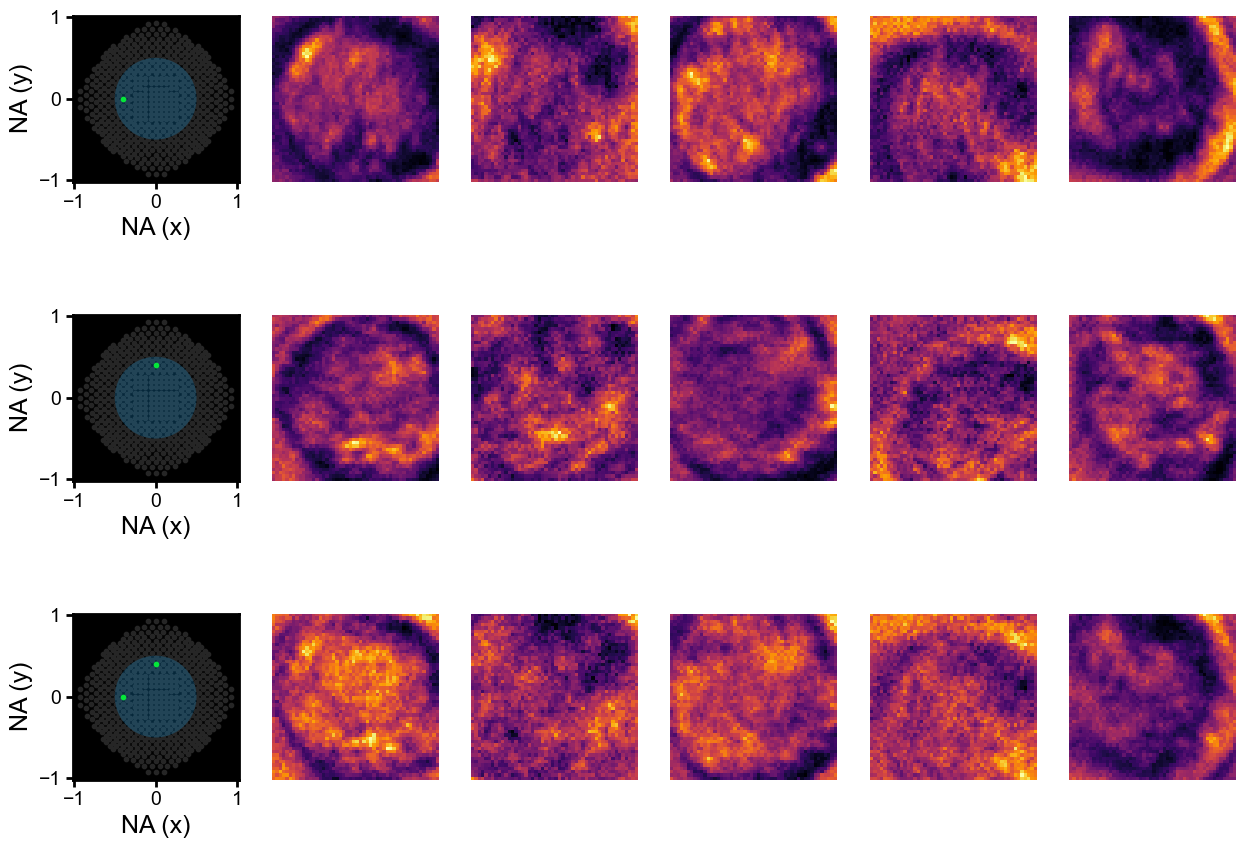

In [8]:
num_images = 4000
patch_size = 50
num_patches = 20000

# num_images = 400
# patch_size = 50
# num_patches = 2000

num_patches_to_show = 5

fig, axes = plt.subplots(1, 1, figsize=(6,4), sharex='col')

list_of_led_index_lists = [(118,), 
                           (119,), 
                           (118, 119),                        
                           ]

example_patch_fig, example_patch_axes = plt.subplots(len(list_of_led_index_lists), 
                                        num_patches_to_show + 1, figsize=(3 * num_patches_to_show, 2 + 3 * len(list_of_led_index_lists)))

# synthesize multi-led patterns with equalized noise among components
images = {led_index_list: generate_synthetic_multi_led_images(bsccm_coherent, led_index_list, edge_crop=32)
            for led_index_list in list_of_led_index_lists}

# now compute scale factors between multi-led synthetic images
photon_rescale_fractions = compute_photon_rescale_fraction(None, list_of_led_index_lists, images)

hist = OverlayedHistograms(ax=axes, bins=50)

for index, led_index_list in enumerate(list_of_led_index_lists):
    photon_scaled_images = images[led_index_list]
    patches = extract_patches(photon_scaled_images, patch_size=patch_size, num_patches=num_patches)
    patches = add_shot_noise_to_experimenal_data(patches, photon_rescale_fractions[led_index_list])
    values = compute_eigenvalues(patches)

    # plot a few example patches
    plot_led_pattern(ax=example_patch_axes[index, 0], led_indices=led_index_list, 
                     legend=False, shorten_na_labels=True)

    for j in range(num_patches_to_show):
        ax = example_patch_axes[index, 1 + j]
        im = ax.imshow(patches[j], cmap='inferno', interpolation='nearest')
        clear_spines(ax, all=True)
        ax.set(xticks=[], yticks=[])

    values = compute_eigenvalues(patches)
    hist.add(values, label='{} LEDs'.format(len(led_index_list)))
    axes.set(xlabel='Eigenvalues (photons)', ylabel='Count', title='Eigenvalue spectrum')

hist.plot()
axes.set(xlabel='Eigenvalues (photons)', ylabel='Count')
axes.legend()
clear_spines(axes)
# fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_eigenvalue_spectrum_real_data_with_different_exposure' + '.pdf', transparent=True)
# example_patch_fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_example_patches_real_data_with_different_exposure' + '.pdf', transparent=True)
